In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data # features, 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
y = iris.target # label, 'setosa' 'versicolor' 'virginica'

print('A data:', X[0], '\nLabel:', y[0])

A data: [5.1 3.5 1.4 0.2] 
Label: 0


In [2]:
import numpy as np
re_y = np.array([1 if i==0 else 0 for i in y]) # 'setosa':1, 'not setosa':0
print(re_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


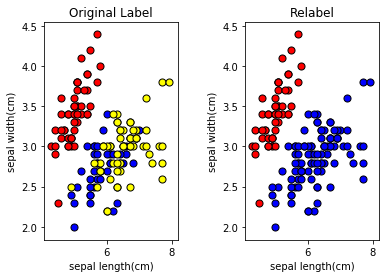

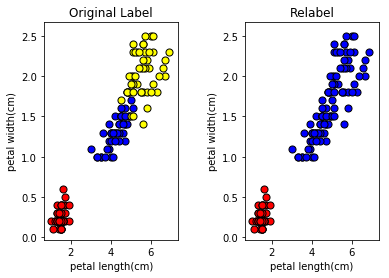

In [6]:
import matplotlib.pyplot as plt

def plot(xfeature_name, yfeature_name, xfeature, yfeature, ori_label, re_label):
    # setting color
    ori_color = {0: 'red', 1: 'blue', 2: 'yellow'} # label, 0:'setosa' 1:'versicolor' 2:'virginica'
    relbl_color = {0: 'blue', 1: 'red'} # relabel, 0:'not setosa' 1:'setosa'
    # plot
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace = 0.5)
    plt.title("Original Label")
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, ori_label):
        plt.scatter(i, j, c=ori_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)

    plt.subplot(1, 2, 2)
    plt.title("Relabel")
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, re_label):
        plt.scatter(i, j, c=relbl_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)


plot('sepal length(cm)', 'sepal width(cm)', X[:, 0], X[:, 1], y, re_y)
plot('petal length(cm)', 'petal width(cm)', X[:, 2], X[:, 3], y, re_y)
plt.show()

In [4]:
"""
Desing ANN Model
"""
class my_NN(object):
    def __init__(self, input_units, output_units, hidden_units):
        self.input = input_units # feature numbers
        self.output = output_units # class number 
        self.hidden_units = hidden_units # single layer
        
        # initialize matrix of weights;
        np.random.seed(1) 
        # weight1: input -> hidden layer 
        self.w1 = np.random.randn(self.input, self.hidden_units)
        self.b1 = np.zeros(shape=(self.hidden_units, 1))        

        # weight2: hidden layer -> output
        self.w2 = np.random.randn(self.hidden_units, self.output)
        self.b2 = np.zeros(shape=(self.output, 1))
        

    def _forward_propagation(self, X):
        # W^T dot X
        self.z2 = np.dot(self.w1.T, X.T) + self.b1
        self.a2 = self._sigmoid(self.z2)
        self.z3 = np.dot(self.w2.T, self.a2) + self.b2
        self.a3 = self._sigmoid(self.z3)
        return self.a3

    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def _sigmoid_prime(self, z):
        return self._sigmoid(z)*(1-self._sigmoid(z))
    
    def _backward_propagation(self, X, y):
        predict = self._forward_propagation(X)
        m = X.shape[0]
        delta3 = predict - y
        dz3 = np.multiply(delta3, self._sigmoid_prime(self.z3))
        self.dw2 = (1/m)*np.sum(np.multiply(self.a2, dz3), axis=1).reshape(self.w2.shape)
        
        delta2 = delta3*self.w2*self._sigmoid_prime(self.z2)
        self.dw1 = (1/m)*np.dot(X.T, delta2.T)

    def _update(self, learning_rate=1.2):
        self.w1 = self.w1 - learning_rate*self.dw1
        self.w2 = self.w2 - learning_rate*self.dw2
        
    def _loss(self, predict, y):
        logprobs = np.multiply(np.log(predict), y) + np.multiply((1 - y), np.log(1 - predict))
        loss = - np.sum(logprobs) / y.shape[0]
        return loss
    
    def predict(self, X):
        y_hat = self._forward_propagation(X)
        y_hat = [1 if i[0]>= 0.5 else 0 for i in y_hat.T]
        return np.array(y_hat)
    
    def train(self, X, y, iteration=34):
        for i in range(iteration):
            y_hat = self._forward_propagation(X)
            loss = self._loss(y_hat, y)
            self._backward_propagation(X,y)
            self._update()
            if i%10==0:
                print("loss: ", loss)
                
    def score(self, predict, y):
        cnt = np.sum(predict==y)
        return (cnt/len(y))*100

In [5]:
from sklearn.model_selection import train_test_split
if __name__=='__main__':

    train_X, test_X, train_y, test_y = train_test_split(X, re_y, random_state=4, test_size=0.25) # split training data and testing data
    input_feature = train_X.shape[1]
    output_units = 1
    hidden_units = 6
    clr = my_NN(input_feature, output_units, hidden_units) #initialize the model
    clr.train(train_X, train_y) # train model
    pre_y = clr.predict(test_X) # predict
    score = clr.score(pre_y, test_y) # get the accuracy score
    print('predcit: ', pre_y)
    print('anser:', test_y)
    print('score: ', score)    

loss:  0.8397954104431425
loss:  0.527004500613035
loss:  0.45066235073937466
loss:  0.3951326953572771
predcit:  [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0]
anser: [0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 0]
score:  71.05263157894737
